In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Operadores Morfológicos

In [2]:
def load_image():
  blank_img = np.zeros((600,600))
  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(blank_img,text='ABCD', org=(50,300), fontFace=font,fontScale=5,color=(255,255,255),thickness=25)
  return blank_img

In [3]:
def display_img(img):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

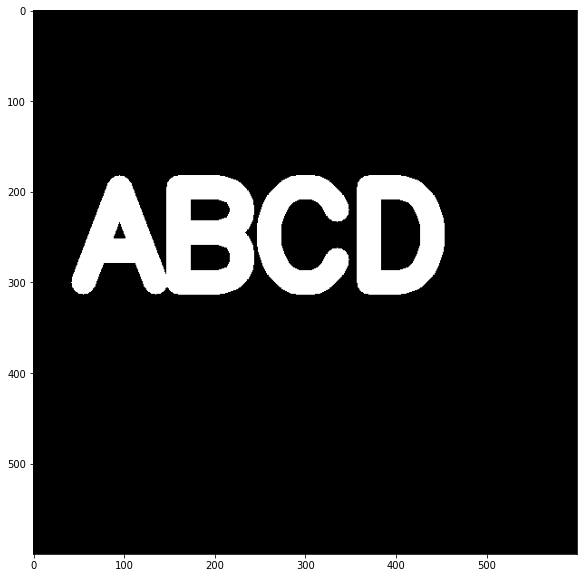

In [4]:
img = load_image()
display_img(img)

In [5]:
kernel = np.ones((5,5),dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

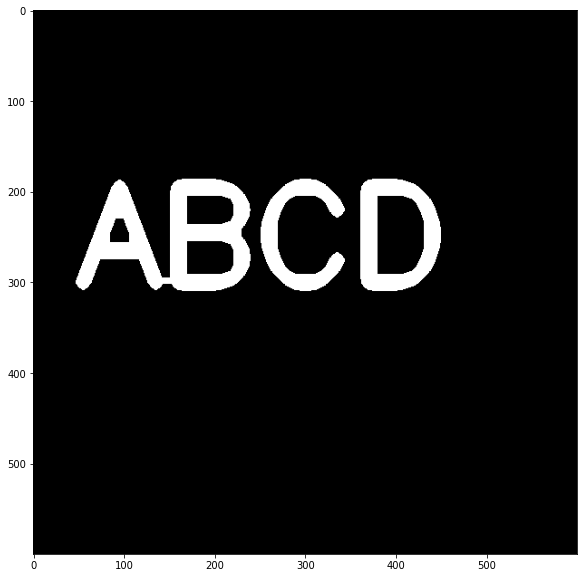

In [6]:
result = cv2.erode(img,kernel,iterations=2)
display_img(result)

In [7]:
img = load_image()

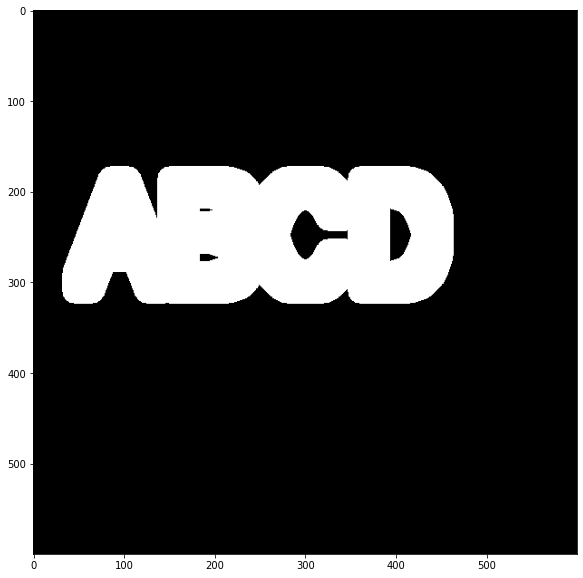

In [8]:
result = cv2.dilate(img,kernel,iterations=5)
display_img(result)

In [17]:
img = load_image()
img.max()

255.0

In [18]:
white_noise = np.random.randint(low=0, high=2,size=(600,600))
white_noise

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 1]])

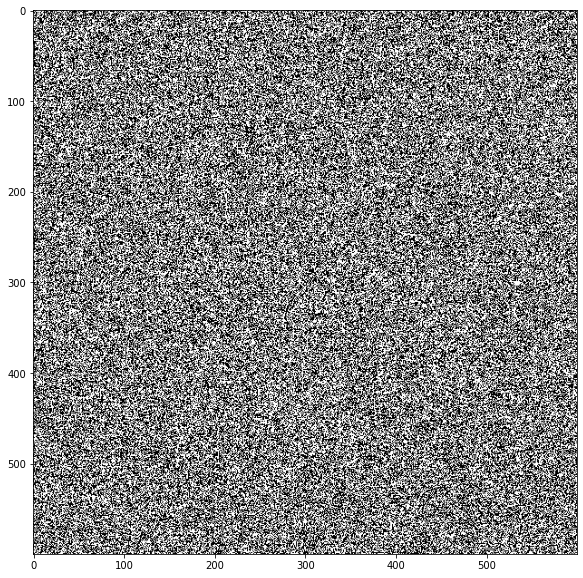

In [19]:
white_noise = white_noise*255
display_img(white_noise)

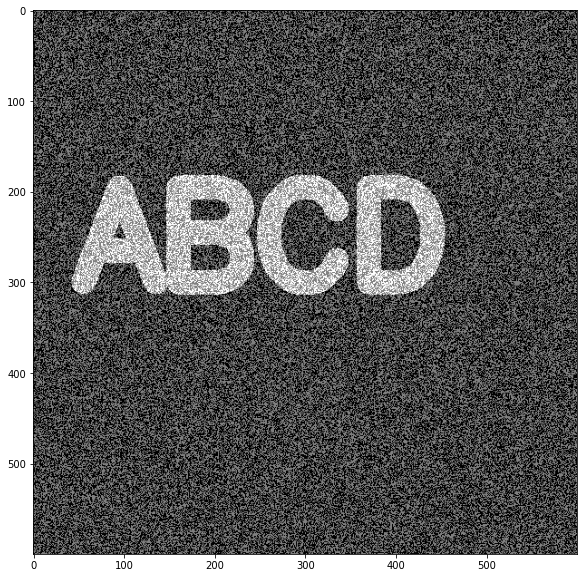

In [21]:
noise_img = white_noise + img
display_img(noise_img)

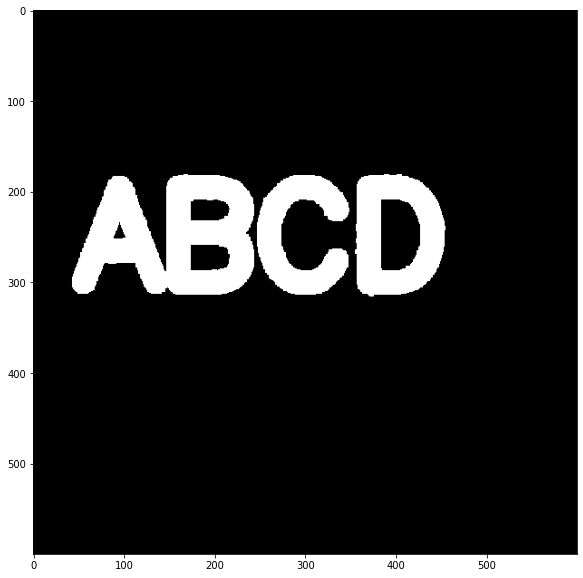

In [23]:
openning = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)
display_img(openning)

In [24]:
img = load_image()

In [25]:
black_noise = np.random.randint(low=0, high=2, size=(600,600))
black_noise = black_noise*-255

In [26]:
black_noise

array([[-255,    0, -255, ..., -255, -255, -255],
       [   0, -255,    0, ..., -255,    0,    0],
       [-255,    0, -255, ..., -255,    0, -255],
       ...,
       [   0, -255,    0, ...,    0, -255, -255],
       [   0,    0,    0, ..., -255,    0, -255],
       [   0, -255, -255, ..., -255,    0, -255]])

In [27]:
black_noise = img + black_noise
black_noise

array([[-255.,    0., -255., ..., -255., -255., -255.],
       [   0., -255.,    0., ..., -255.,    0.,    0.],
       [-255.,    0., -255., ..., -255.,    0., -255.],
       ...,
       [   0., -255.,    0., ...,    0., -255., -255.],
       [   0.,    0.,    0., ..., -255.,    0., -255.],
       [   0., -255., -255., ..., -255.,    0., -255.]])

In [28]:
black_noise[black_noise==-255]=0
black_noise.min()

0.0

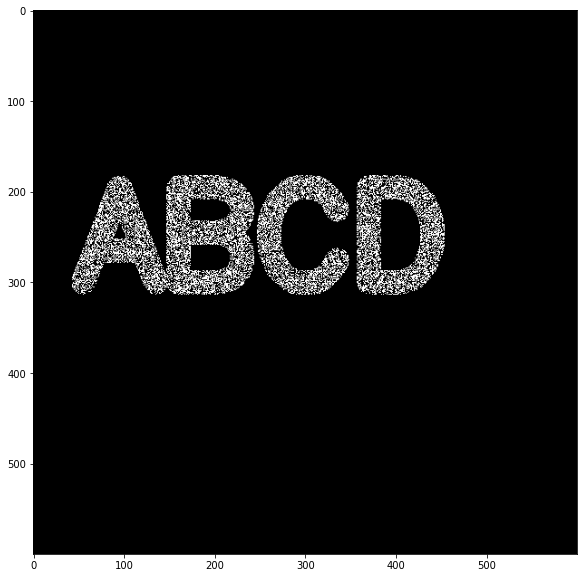

In [29]:
display_img(black_noise)

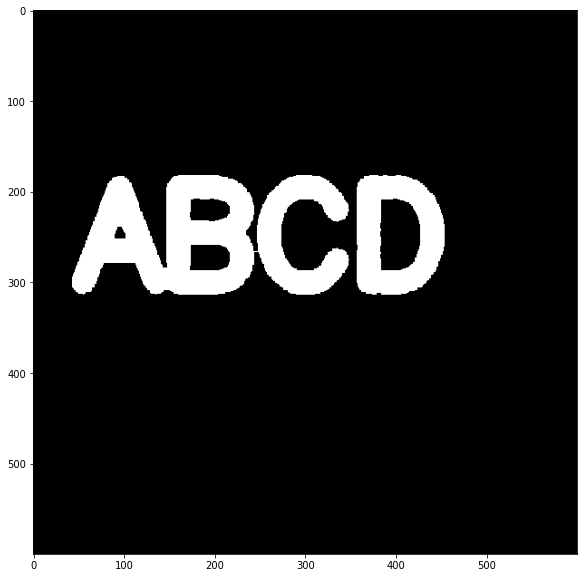

In [31]:
closing = cv2.morphologyEx(black_noise,cv2.MORPH_CLOSE,kernel)
display_img(closing)

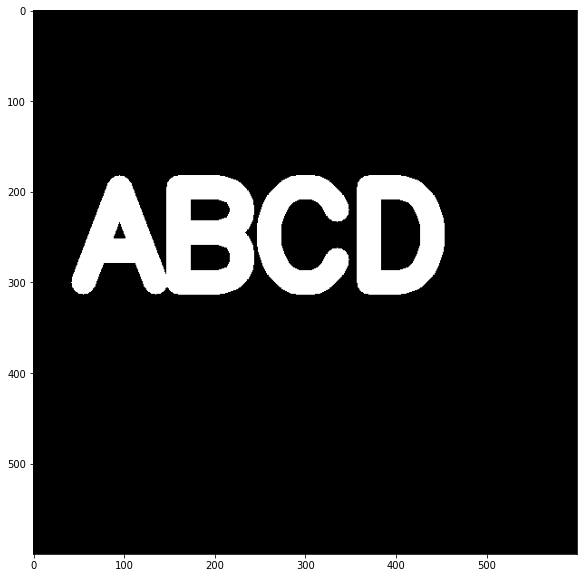

In [32]:
img = load_image()
display_img(img)

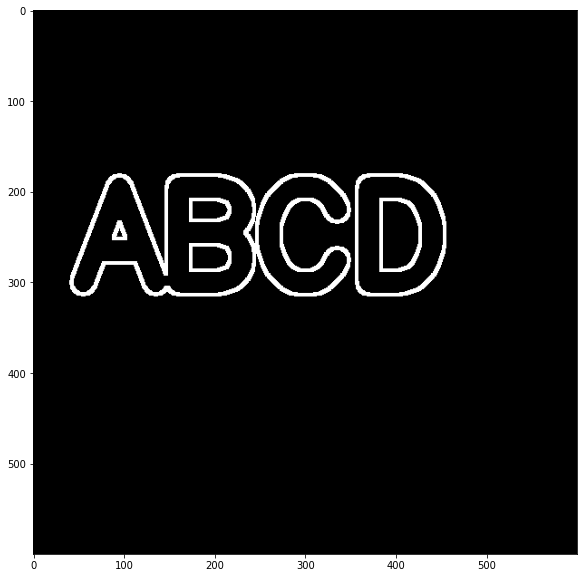

In [33]:
gradiente = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradiente)

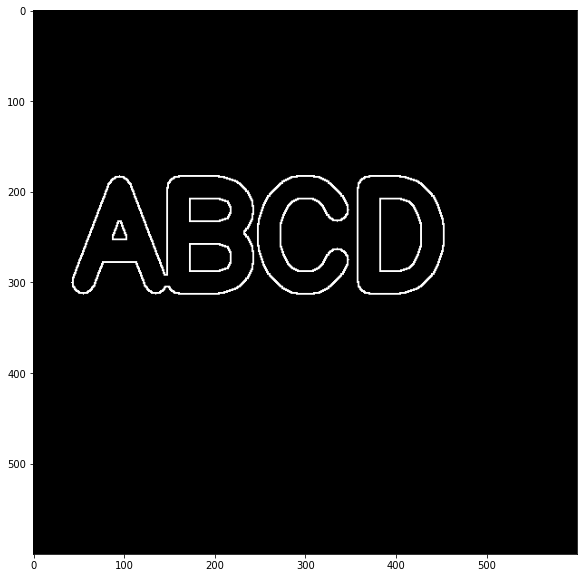

In [38]:
img = load_image()
erodada = cv2.erode(img,kernel,iterations=1)
bordes = img - erodada
display_img(bordes)

# Fill Holes

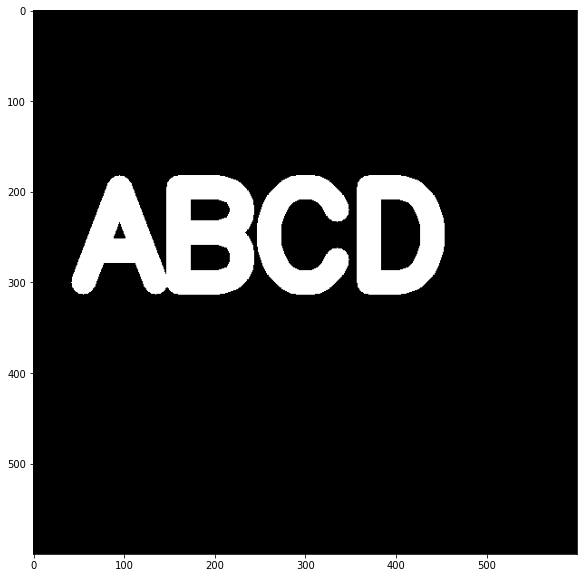

In [45]:
img = load_image()
display_img(img)

In [46]:
def fill_holes(input_img):
  img_flood_fill = input_img.copy()
  h, w = input_img.shape[:2]
  mask = np.zeros((h+2,w+2),np.uint8)
  img_flood_fill = img_flood_fill.astype('uint8')
  cv2.floodFill(img_flood_fill,mask,(100,100),255)
  img_flood_fill_inv = cv2.bitwise_not(img_flood_fill)
  img_out = img_flood_fill |img_flood_fill_inv

  return img_out

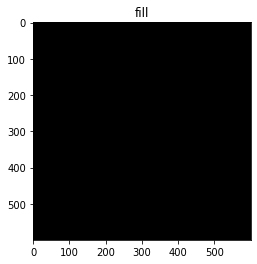

In [47]:
img_fill = fill_holes(img)
#display_img(img_fill)
plt.imshow(img_fill,cmap='gray')
plt.title('fill')
plt.show()

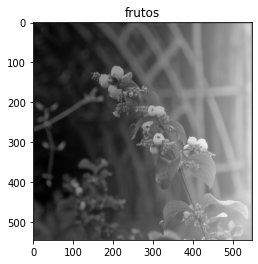

In [80]:
imgFrutos = cv2.imread('/content/drive/MyDrive/Colab Notebooks/frutos.png')
plt.imshow(imgFrutos,cmap='gray')
plt.title('frutos')
plt.show()

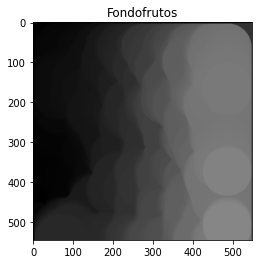

In [95]:
n = 120
imgFru = cv2.morphologyEx(imgFrutos,cv2.MORPH_OPEN,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(n,n)))
#imgFru = cv2.morphologyEx(imgFrutos,cv2.MORPH_OPEN,kernel,iterations=20)

plt.imshow(imgFru,cmap='gray')
plt.title('Fondofrutos')
plt.show()

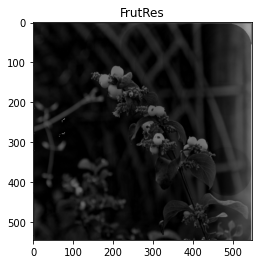

In [103]:
FrutRes = imgFrutos.astype('uint8') - imgFru.astype('uint8')
#plt.figure(figsize=(10,10))
plt.imshow(FrutRes,cmap='gray')
plt.title('FrutRes')
plt.show()

In [104]:
th=80
D = FrutRes>th
display_img(D)
#plt.imshow(FrutRes,cmap='gray')
#plt.title('Thershold')
#plt.show()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f3e5c853710> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 864x720 with 1 Axes>